<a href="https://colab.research.google.com/github/Sairam307/Hotel_booking_analysis_EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project_SaiRam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
#This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
#Explore and analyze the data to discover important factors that govern the bookings.

#Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Mount Drive

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


#File path

In [3]:
#read the hotel book analysis csv formated data
file_path ='/content/Drive/MyDrive/Alma/Capstone_project/Hotel Bookings.csv'

#Read Data

In [4]:
Hotel_data =  pd.read_csv(file_path)

#Data Explore

In [5]:
#info
#dislays the data types of each column and non null calue count
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#shape of the data
print(f' The Data contains total {Hotel_data.shape[0]} rows and {Hotel_data.shape[1]} columns')

 The Data contains total 119390 rows and 32 columns


In [7]:
#head
Hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
#tail
Hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
#describe the data,
# which includes count, mean, std, min, 25%, 50%, 75%, and max 
Hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Columns

In [10]:
#list of column names
Hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# creating a copy of our dataset
df=Hotel_data.copy()

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
# changing datatype of column 'reservation_status_date' to date_type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

# Data Cleaning

In [14]:
# checking for the duplicate rows
df.duplicated().value_counts() 

False    87396
True     31994
dtype: int64

Data contains 31994  of duplicate rows 

In [15]:
#drop the duplicate rows
df= df.drop_duplicates()

In [16]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  b

In [17]:
#shape of the data(rows*columns)
df.shape
print(f'after drop the duplicate rows,we have {df.shape[0]} rows and {df.shape[1]} columns')

after drop the duplicate rows,we have 87396 rows and 32 columns


In [18]:
# looking for  Columns having missing values.
df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


we have 4 columns with missing or NaN values,those columns are,

1.   company
2.   agent
3.country
4.children

> I am replaing  the NaN values value with Zero(0) in **Company** , **Agent** and **Chidren** columns 


> Also for **Country** column, iam  replacing the NaN values with 'others'









In [19]:
#replace NaN values with zeros 
null_list = ['company','agent','children'] 

for i in null_list:
  df[i].fillna(0, inplace = True)

In [20]:
#replace NaN values with 'others' in country column
df['country'].fillna('others', inplace = True)

In [21]:
#check the output
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    




> All the missing/NaN values were replaced



#check and remove the rows, which have no value in adults, babies and children columns because all those columns having zero values means no bookings were made 


In [22]:
#no.of rows with zero values in adults, babies and children
len(df[df['adults']+df['babies']+df['children']==0])

166

from the data,166 rows does not having any value in adults, babies and children columns, we can remove those rows

In [23]:
df.drop(df[df['adults']+df['babies']+df['children']==0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

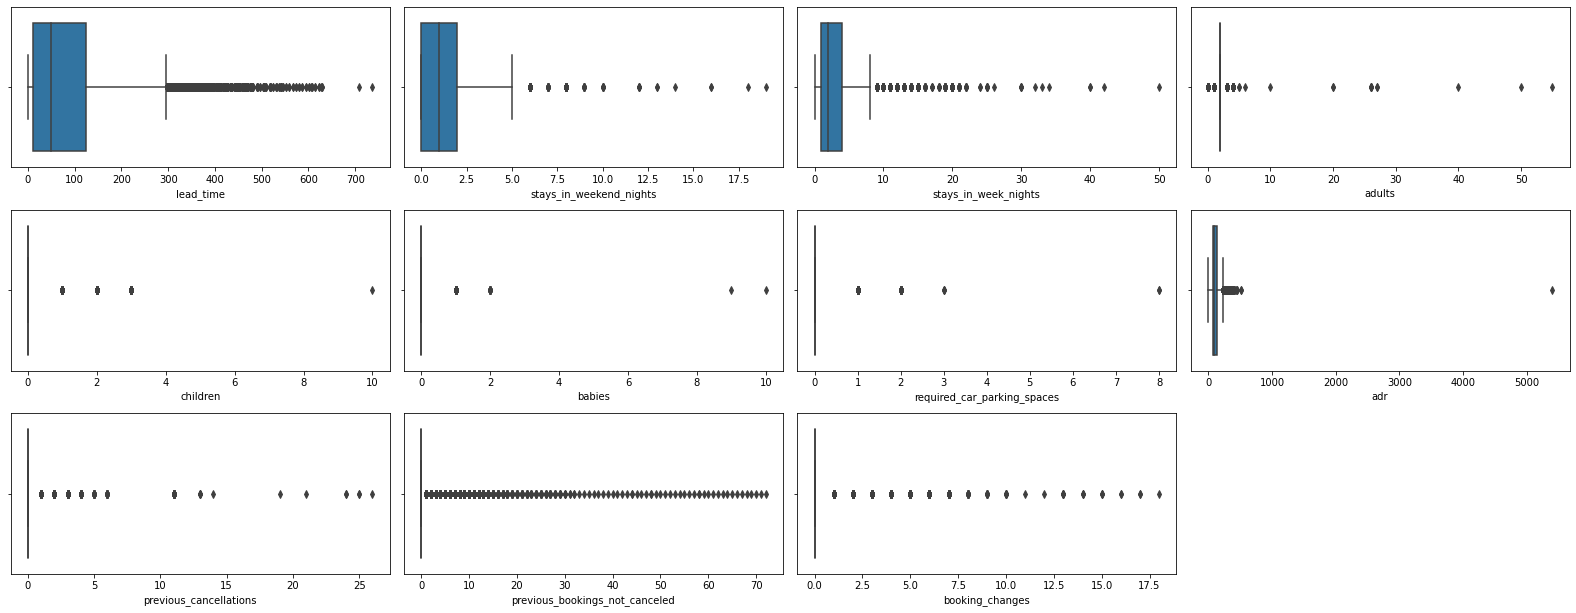

In [24]:
#check outliers in continuous columns
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(22,11))
for i in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[i])
  plt.tight_layout()


We remove the outliers by using conditionals to get and update these values.

In [25]:
#removing outliers from data
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

We removed the outliers. Our data is clean now.

In [26]:
#add some new columns

df['total_people'] = df['adults'] + df['babies'] + df['children']   
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [27]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,...,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.924189,2016.210352,26.835091,15.815832,0.998922,2.600631,1.875570,0.138783,0.010627,...,0.040559,0.264049,81.089258,10.984948,0.746291,106.467589,0.084122,0.698934,2.024980,3.599553
std,0.446637,85.804322,0.686064,13.669216,8.835545,0.993138,1.889452,0.505248,0.455042,0.104203,...,0.197268,0.661355,109.977255,53.956668,10.001001,51.970778,0.279097,0.832051,0.700854,2.540014
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2.000000,5.000000
max,1.000000,500.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,4.000000,3.000000,2.000000,...,1.000000,5.000000,535.000000,543.000000,391.000000,1000.000000,3.000000,5.000000,5.000000,15.000000


# *Exploratory Analysis and Visualization*

#Univariate Analysis

#1.What is the pecentage of cancellation?

0 means not cancelled
1 means cancelled
0    72.476212
1    27.523788
Name: is_canceled, dtype: float64


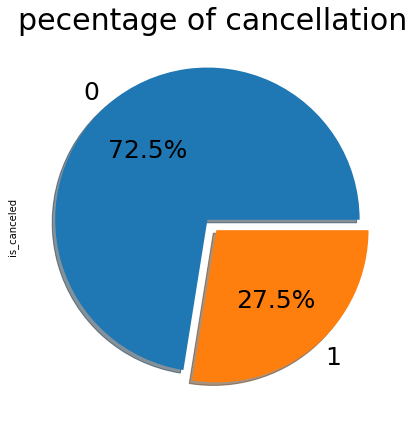

In [28]:
#pecentage of cancellation
df.is_canceled.value_counts().plot.pie(explode=[0.05, 0.04], autopct='%1.1f%%', shadow=True, figsize=(14,7),fontsize=25)   
#title
plt.title('pecentage of cancellation', fontsize = 30)
print('0 means not cancelled')
print('1 means cancelled')
#normalize
print(df.is_canceled.value_counts(normalize=True)*100)



> 27.5 % of the bookings were cancelled.



#2.What is percentage of bookings in each hotel?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

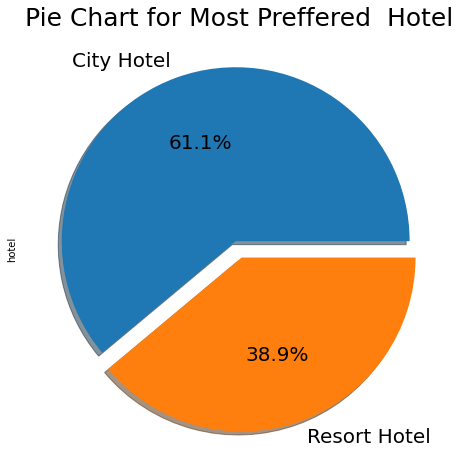

In [29]:
#percentage of bookings in each hotel
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
#title
plt.title('Pie Chart for Most Preffered  Hotel', fontsize = 25)


Around 61.1% bookings are for City hotel and 38.9% bookings are for Resort hotel.

#3. What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

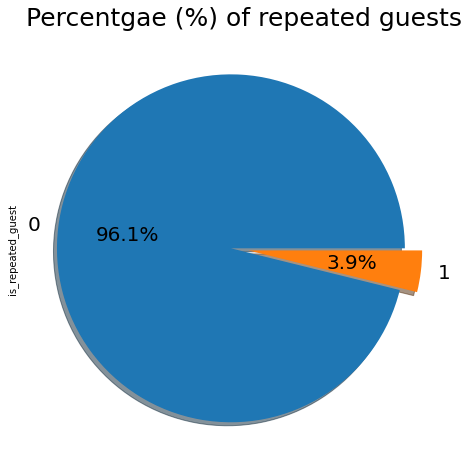

In [30]:
#Percentage of repeated guests
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests", fontsize=25)


Repeated guests are only 3.9 %.
get the feedback from the guests and improve service

#4.Which agent makes most no. of bookings?                

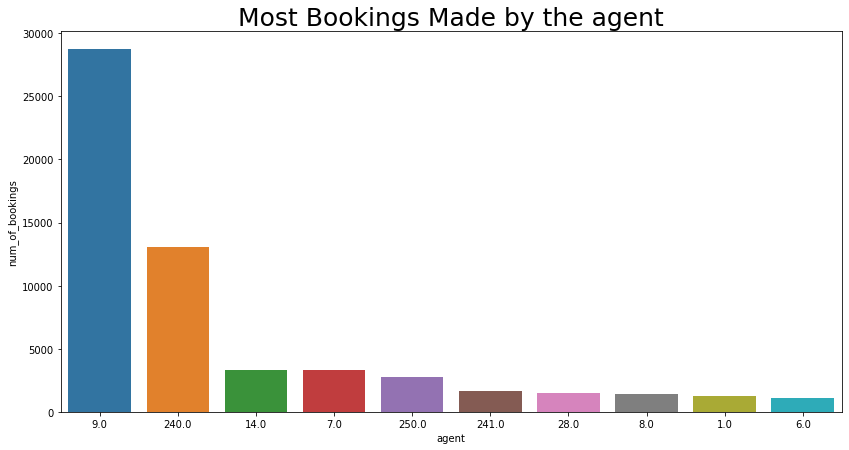

In [31]:
#Number of booiking through agent
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)  #dropping the rows which are equal zero          
d1 = d1[:10]                                                   #selecting top 10 agents
plt.figure(figsize = (14,7)) #figure size
plt.title("Most Bookings Made by the agent", fontsize = 25) #title
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent) #representing the plot in ascending order



> Most Bookings Made by the agent ID is no:9



#5. Which meal type is most preffered meal of customers?

Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC — no meal package;
BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)


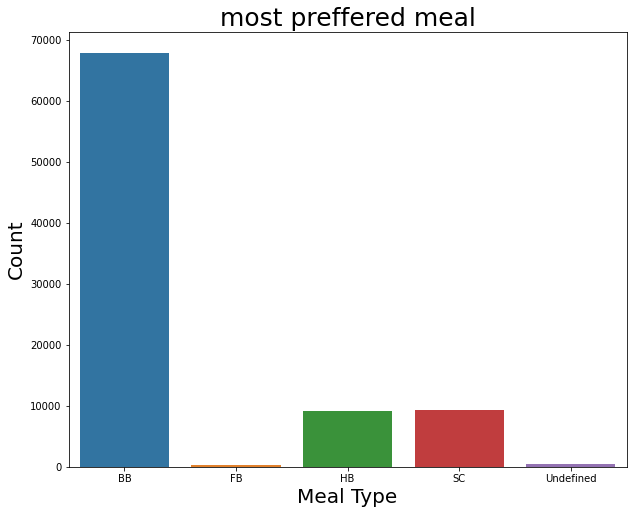

In [32]:
#Most preffered meal
plt.figure( figsize=(10, 8))
plt.title("most preffered meal", fontsize = 25)
sns.countplot(x = df['meal'])
plt.xlabel('Meal Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

Most preferred meal type is BB (Bed and breakfast).

# 6.Which year had the highest bookings?

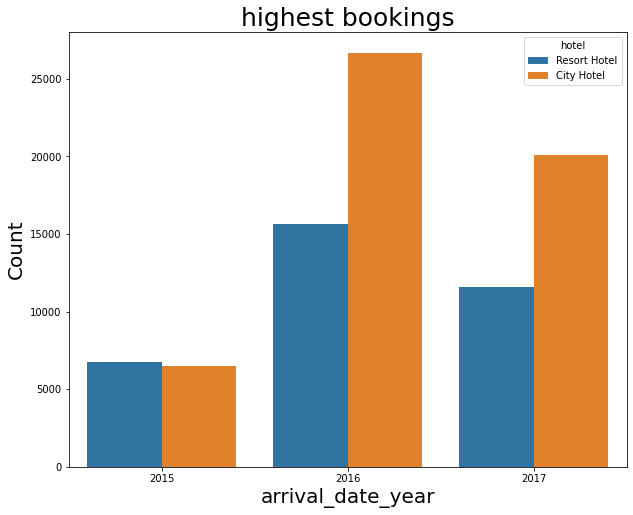

In [33]:
#highest bookings ON EACH HOTEL
plt.figure( figsize=(10, 8))
plt.title("highest bookings", fontsize = 25)
sns.countplot(x = df['arrival_date_year'],hue=df['hotel'])
plt.xlabel('arrival_date_year', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In 2016 year had the highest bookings


> city hotel is the most preferd type of hotel



Transient type of customers are the more around 75%

#7.From which country the most guests are coming?

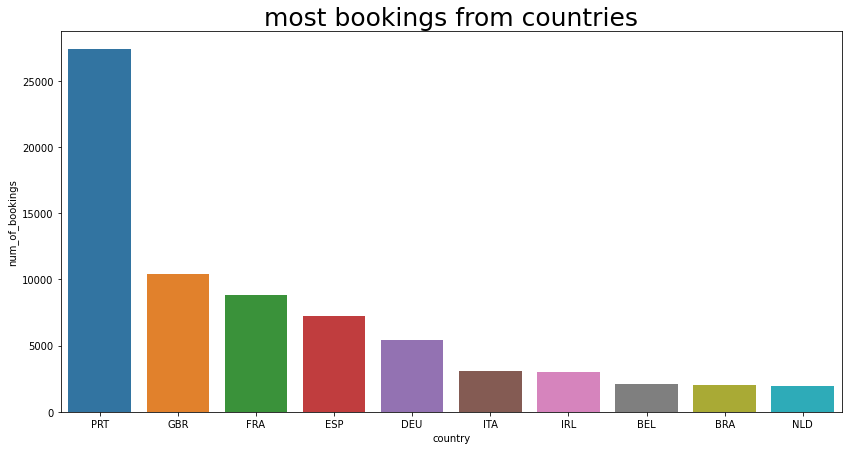

In [34]:
#most bookings from countries
d1 = pd.DataFrame(df['country'].value_counts()).reset_index().rename(columns = {'index':'country','country':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['country'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (14,7))
plt.title("most bookings from countries", fontsize = 25)
sns.barplot(x = 'country', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).country)

abbreevations for countries-
1.PRT- Portugal;
2.GBR- United Kingdom;
3.FRA- France;
4.ESP- Spain;
5.DEU - Germany;
6.ITA -Itlay;
7.IRL - Ireland;
8.BEL -Belgium;
9.BRA -Brazil;
9.NLD-Netherlands;

Most guest are from Portugal and other Europian contries.

#8.Which is the most preferred room type by the customers?

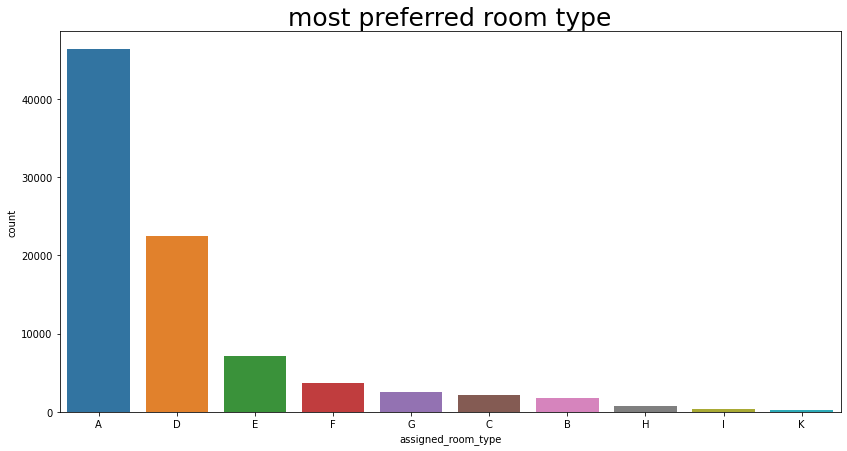

In [35]:
#most preferred room type
d1 = pd.DataFrame(df['assigned_room_type'].value_counts()).reset_index().rename(columns = {'index':'assigned_room_type','assigned_room_type':'count'}).sort_values(by = 'count', ascending = False)
d1.drop(d1[d1['assigned_room_type'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (14,7))
plt.title("most preferred room type", fontsize = 25)
sns.barplot(x = 'assigned_room_type', y = 'count', data = d1, order = d1.sort_values('count', ascending = False).assigned_room_type)

Room type 'A' id the most prefered type for most of customers

#10.In which month most of the bookings happened?

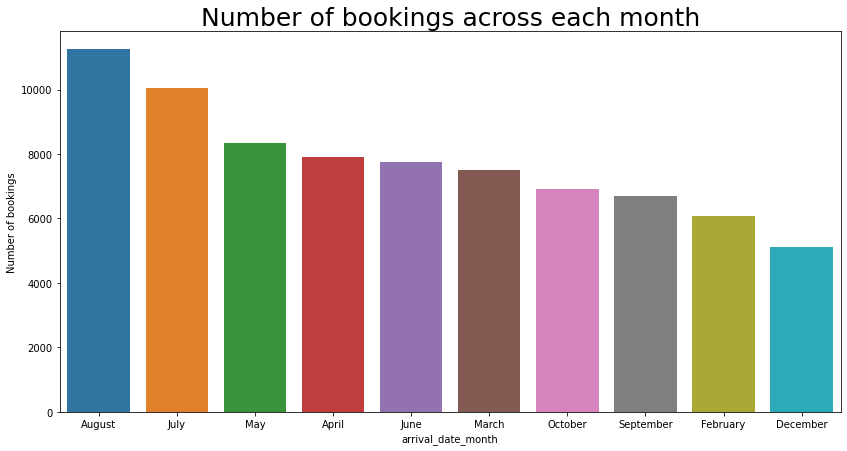

In [36]:
#Number of bookings across each month
d1 = pd.DataFrame(df['arrival_date_month'].value_counts()).reset_index().rename(columns = {'index':'arrival_date_month','arrival_date_month':'Number of bookings'}).sort_values(by = 'Number of bookings', ascending = False)
d1.drop(d1[d1['arrival_date_month'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (14,7))
plt.title("Number of bookings across each month", fontsize = 25)
sns.barplot(x = 'arrival_date_month', y = 'Number of bookings', data = d1, order = d1.sort_values('Number of bookings', ascending = False).arrival_date_month)

Most bookings were done in August and july month

#11.how many nights stays_in_week_nights?


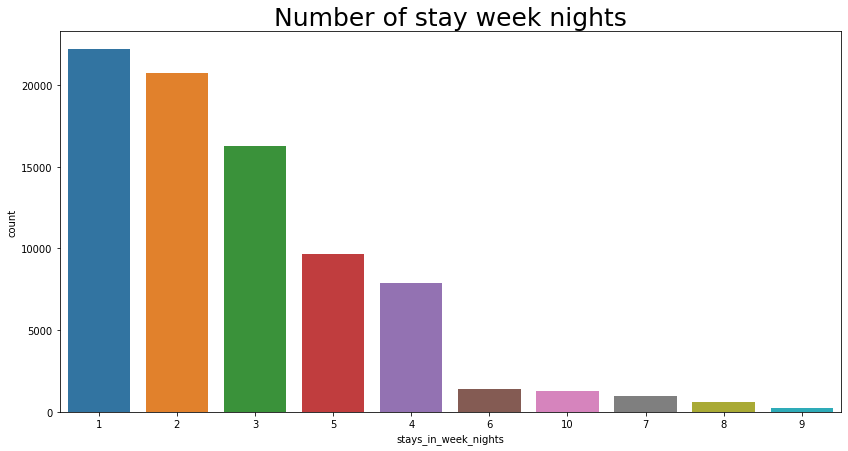

In [37]:
#Number of stay week nights
d1 = pd.DataFrame(df['stays_in_week_nights'].value_counts()).reset_index().rename(columns = {'index':'stays_in_week_nights','stays_in_week_nights':'count'}).sort_values(by = 'count', ascending = False)
d1.drop(d1[d1['stays_in_week_nights'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (14,7))
plt.title("Number of stay week nights", fontsize = 25)
sns.barplot(x = 'stays_in_week_nights', y = 'count', data = d1, order = d1.sort_values('count', ascending = False).stays_in_week_nights)

most of the customers stays in one night and 2 nights in hotels

#Bivariate Analysis

#1.which hotel seems to make more revenue?

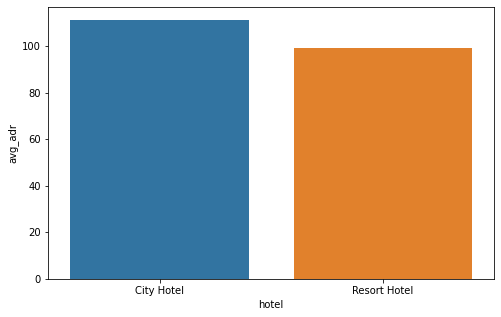

In [38]:
grouped_by_hotel = df.groupby('hotel')
d = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d['hotel'], y = d['avg_adr'] )
plt.show()

Avg adr of city hotel is slightly higher than that of resort hotel

# 2.Which hotel has higher lead time?

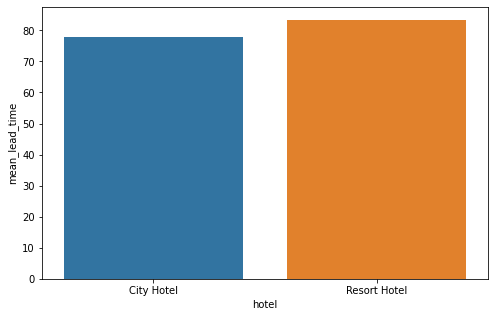

In [39]:
d2 = grouped_by_hotel['lead_time'].mean().reset_index().rename(columns = {'lead_time':'mean_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['mean_lead_time'] )
plt.show()

Resort hotels has slightly high avg lead time

# 3.Which hotel has longer waiting time?

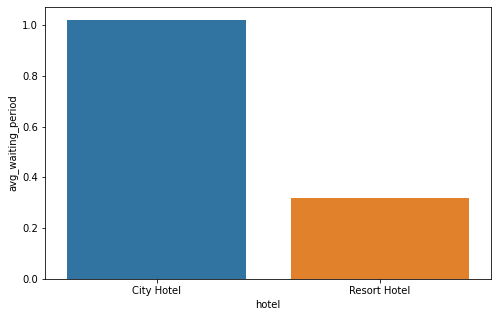

In [40]:
d3 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_waiting_period'] )
plt.show()

City hotel has longer waiting time then resort hotel,means City Hotel is much busy than Resort Hotel.

# 4.In which months, the ADR is high among hotel types?

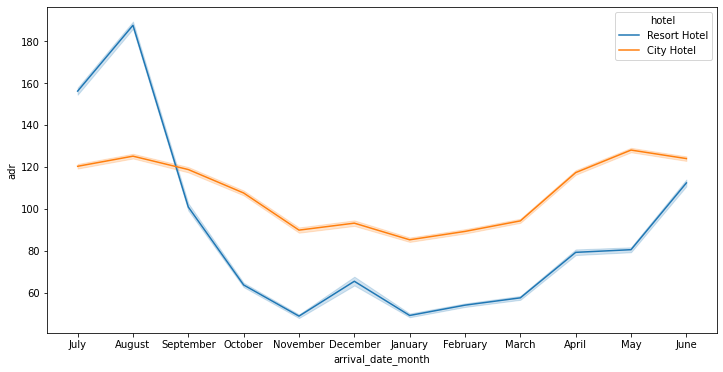

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

#5.Which is the most common channel for booking hotels?

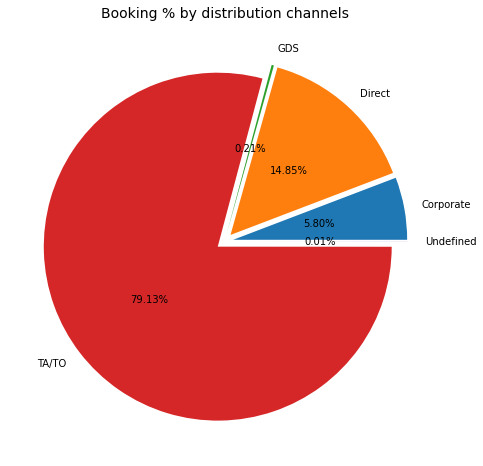

In [42]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

'TA/TO' is most common channel for booking hotels.
It occupies 79.13% among all other channels

#6.Which significant distribution channel has highest cancellation percentage?

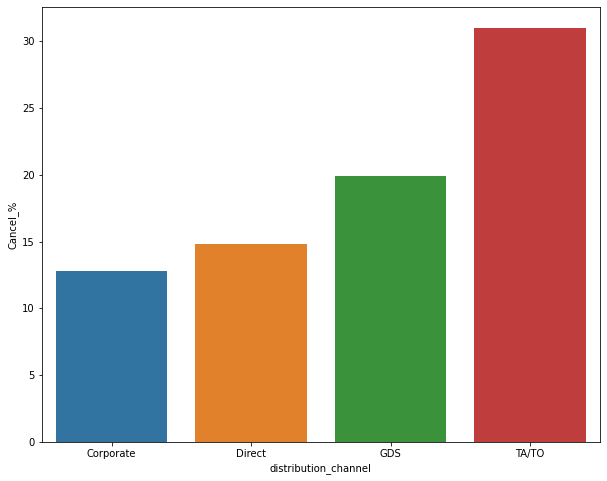

In [43]:
group_by_dc = df.groupby('distribution_channel')
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,8))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

#7.Which channel has longer average waiting time?

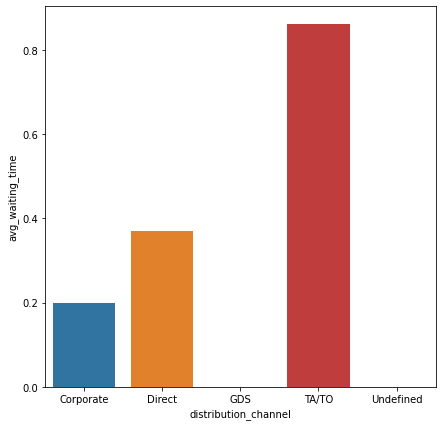

In [44]:
d7 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,7))
sns.barplot(x = d7['distribution_channel'], y = d7['avg_waiting_time'])
plt.show()

TA/TO taking little longer time  to confirm booking of rooms.

#8.What is the Optimal stay length in both types of hotels ?

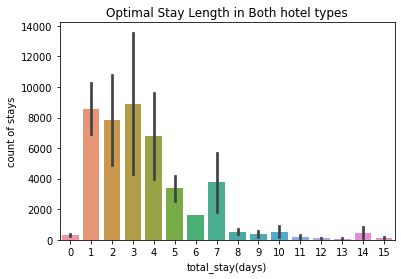

In [45]:

# group by total stay and hotel
d8 = df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   
d8 = d8.iloc[:, :3]                                                   
d8 = d8.rename(columns={'is_canceled':'Number_of_stays'})   
sns.barplot(x = d8['total_stay'], y = d8['Number_of_stays'])
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')
plt.show()

Optimal stay in both the type hotel is less than 7 days

#9.correlation between the numerical data

Text(0.5, 1.0, 'Co-relation of the columns')

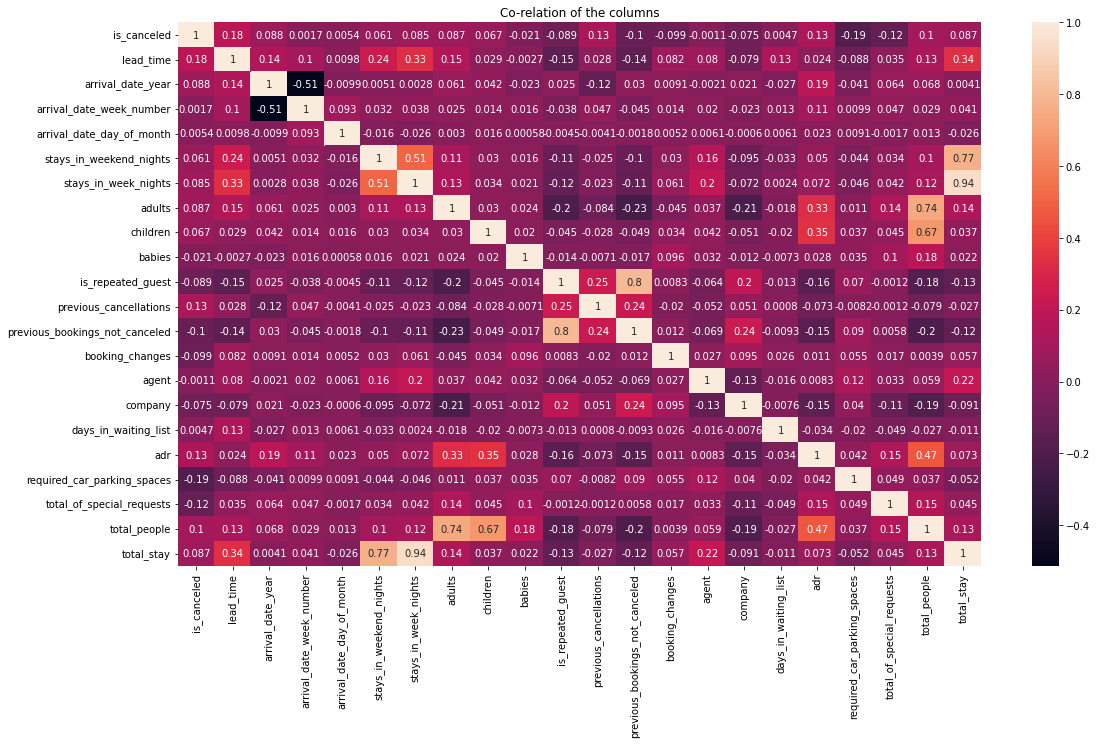

In [46]:

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

1.lead time and Stays_in_week_nights are positively co-related

2.Stays_in_weekend_nights and Total_stay are co-related

3.Previous bookings not cancelled and is repeated guest are highly co-related positively, it indicates that repeated guests not cancelled the previous bookings

4.adr and total_people are co-related ,as people increases adr also increases



#FINAL SUMMARY

1.From the data,it is confirmed that 27.5% of the bookings got cancelled.

2.61.1% of the guests preferred city hotel than resort hotel.

3.only 3.9% of the guests were revisiting.to address this get the feedback from the guests it will play one of the role  to identify why guests were not repeating

4.most booking were made by agent ID is no:9

5.guests were  preffered BB(bed & Break fast) than other type of meals

6.in the year 2016, highest bookings were done and guest prefered city hotel

7.most of the guests were came from portugal and other european countries.

8.most of the guests like to prefer room type 'A'

9.In the month of august and july high nnumber of bookings were done

10.city hotel ADR is slightly higher than resort hotel and resort hotel had the high average lead-time

11.city hotel waiting time period much high than resort hotel

12.average daily rate for city hotels is expensive in the months of august, july,june and may,for resort hotel iit is in august,july and september

13.TA/TO' is most common channel for booking hotels. It occupies 79.13% among all other channels.

14.TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled and TA/TO taking little longer time to confirm booking of rooms.

15.Optimal stay in both the type hotel is less than 7 days